In [1]:
from ROOT import TH1, TTree, TFile, TLorentzVector, TCanvas, TGenPhaseSpace
import numpy as np
import matplotlib.pyplot as plt

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C ccache  -O2 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/06


In [2]:
# Initial event parameters
Egamma = 12
mD = 0.938 * 2
m  = 0.000511
genPhase = TGenPhaseSpace()

In [3]:
# Initial Four Vectors
k1,dIn = TLorentzVector(), TLorentzVector()
k1.SetPxPyPzE(0,0,Egamma,Egamma)
dIn.SetPxPyPzE(0,0,0,mD)

# Non-initial four vectors
k2,l1,l2,l3,dOut = TLorentzVector(),TLorentzVector(),TLorentzVector(),TLorentzVector(),TLorentzVector()

In [4]:
# Decay k1+dIn into three final state particles
def decay(k1,dIn):
    genPhase.SetDecay(k1+dIn,3,np.array([m,m,mD]))
    genPhase.Generate()
    l2,l3,dOut = genPhase.GetDecay(0),genPhase.GetDecay(1),genPhase.GetDecay(2)
    l1 = k1-l3
    k2 = dOut-dIn
    return k2,l1,l2,l3,dOut

In [5]:
# Get final state particles
k2,l1,l2,l3,dOut = decay(k1,dIn)

In [6]:
# Get relevant event kinematics
Mll = (l2+l3).M()
Mll2 = Mll**2
t = (dOut-dIn).M2()
tauD=-t/(4*mD**2)
s = mD**2 + 2*mD*Egamma

In [7]:
# Kinematic predictions
cth_d_lab = (Mll2+2*(s+mD**2)*tauD)/(2*(s-mD**2)*np.sqrt(tauD*(1+tauD)))
p_d_lab = np.sqrt(((2*mD**2-t)/(2*mD))**2-mD**2)
p_dilepton_lab = (p_d_lab**2*np.sqrt(1-cth_d_lab**2)*np.abs(np.sqrt(1-cth_d_lab**2))+(Egamma-p_d_lab*cth_d_lab)**2)/np.sqrt(Egamma**2-2*Egamma*p_d_lab*cth_d_lab+p_d_lab**2)
cth_dilepton_lab = (Egamma-p_d_lab*cth_d_lab)/np.sqrt(Egamma**2-2*Egamma*p_d_lab*cth_d_lab+p_d_lab**2)

In [8]:
# Verify predictions
print("Lab Frame: Deuteron cosine(Theta) = ", np.cos(dOut.Theta()), " // Predicted --> " , cth_d_lab)
print("Lab Frame: Deuteron Momentum = ", dOut.P(), " // Predicted --> " , p_d_lab)
print("Lab Frame: Dilepton Momentum = ", (l2+l3).P(), " // Predicted --> " , p_dilepton_lab)
print("Lab Frame: Dilepton Angle = ", np.cos((l2+l3).Theta()), " // Predicted --> " , cth_dilepton_lab)

Lab Frame: Deuteron cosine(Theta) =  0.999866048339062  // Predicted -->  0.9998660483390618
Lab Frame: Deuteron Momentum =  3.2863105307456846  // Predicted -->  3.2863105307456846
Lab Frame: Dilepton Momentum =  8.71429567599634  // Predicted -->  8.714295675996336
Lab Frame: Dilepton Angle =  0.9999809508428176  // Predicted -->  0.9999809508428177


In [9]:
r0 = (s-mD**2)**2
r  = (s-mD**2-Mll2)**2-4*mD**2*Mll2
cth_cm = (2 * s * (t - 2 * mD * mD) + (s + mD * mD)*(s + mD * mD - Mll2)) / np.sqrt(r0 * r)
sth_cm = np.sqrt(1-cth_cm**2)
deltaT = sth_cm*np.sqrt(r)/(2*np.sqrt(s))
comBoost = (k1+dIn).BoostVector()
dIn.Boost(comBoost)
dOut.Boost(comBoost)
qprime=(l2+l3)
qprime.Boost(comBoost)
print(dOut.Pt(),deltaT,qprime.Pt())
dIn.Boost(-comBoost)
dOut.Boost(-comBoost)

0.053787716073886015 0.05378771607391989 0.053787716073885786


In [10]:
# The integral from the paper does converge. Perhaps I should use this for the angular dist of the evtgen

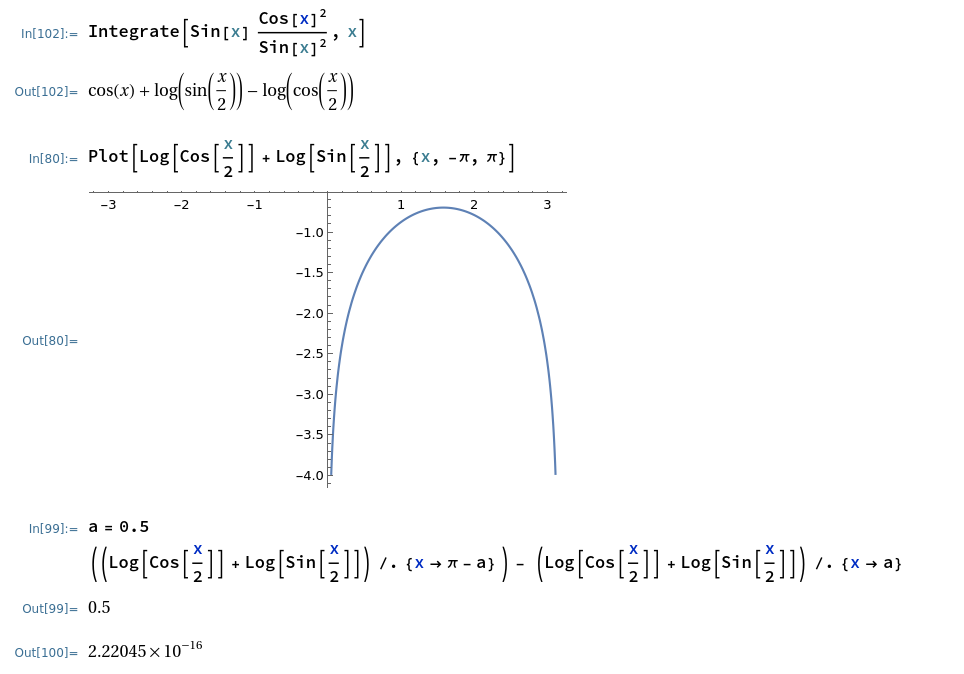

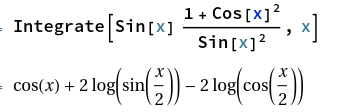

In [11]:
# Angle will still integrate out to Cos[pi]-Cos[0] = -2 (needs abs)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

(array([1041.,  977.,  994., 1007., 1000., 1003., 1034.,  980.,  995.,
         969.]),
 array([-9.99855974e-01, -7.99880168e-01, -5.99904363e-01, -3.99928557e-01,
        -1.99952751e-01,  2.30544895e-05,  1.99998860e-01,  3.99974666e-01,
         5.99950472e-01,  7.99926277e-01,  9.99902083e-01]),
 <BarContainer object of 10 artists>)

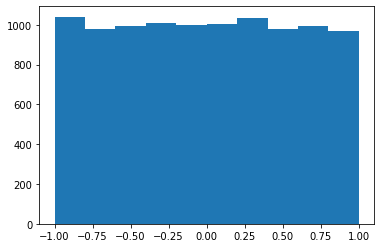

In [13]:
cth = np.zeros(10000)
dIn.SetPxPyPzE(0,0,0,mD)
for i in range(10000):
    genPhase.SetDecay(dIn,2,np.array([m,m]))
    genPhase.Generate()
    cth[i] = genPhase.GetDecay(0).Theta()
plt.hist(cth)